<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9129-CDNA-20203/blob/main/ML_chronic_kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Doença Renal Crônica**
Doença Renal Crônica (DRC) significa que seus rins estão danificados e não podem filtrar o sangue como deveriam. Os principais fatores de risco para o desenvolvimento de doença renal são diabetes, hipertensão, doenças cardíacas e histórico familiar de insuficiência renal.

**Sobre os dados**
Os dados foram coletados ao longo de um período de 2 meses na Índia com 25 características (por exemplo, contagem de glóbulos vermelhos, contagem de glóbulos brancos, etc.). O alvo é a 'classificação', que pode ser 'ckd' ou 'notckd' - ckd = doença renal crônica. Existem 400 linhas.

O conjunto de dados está disponível em: [https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

**Declaração do problema**
O objetivo deste conjunto de dados é classificar os pacientes que sofrem de doença renal crônica e que não sofrem de doença renal crônica com a ajuda de parâmetros como idade, pressão arterial, açúcar, etc.

**Importando bibliotecas**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Carregando dados**

In [2]:
df = pd.read_csv(r'/content/sample_data/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

**Compreendendo os atributos**

*   idade - idade do paciente
*   bp - nível de pressão arterial do paciente
*   sg - A gravidade específica é a relação entre a densidade da substância e a densidade de uma substância de referência.
*   al - Albumina (É um tipo de proteína produzida pelo fígado. É uma das proteínas mais abundantes no sangue. Precisamos de um equilíbrio adequado de albumina para evitar que o fluido vaze dos vasos sanguíneos.)
*   su - Nível de açúcar no sangue
*   rbc - Refere-se aos glóbulos vermelhos no sangue.
*   pc - Pus é o resultado da resposta automática do sistema imunológico natural do corpo a uma infecção, geralmente causada por bactérias ou fungos.
*   pcc - Piúria é uma condição que ocorre quando há excesso de leucócitos ou pus na urina. Parasitas, cálculos renais, tumores e cistos e cistite intersticial também podem causar piúria.
*   ba - Bactéria
*   bgr - Os valores de referência para um teste de glicose aleatório "normal" em um adulto médio são 79-140 mg / dl (4,4-7,8 mmol / l), entre 140-200 mg / dl (7,8-11,1 mmol / l) é considerado pré- diabetes, e ≥ 200 mg / dl é considerado diabetes de acordo com as diretrizes da ADA
*   bu - Nitrogênio no sangue que vem da ureia (uma substância formada pela quebra de proteínas no fígado). Os rins filtram a uréia do sangue para a urina. Um alto nível de nitrogênio da ureia no sangue pode ser um sinal de problema renal.
*   sc - Creatinina sérica (creatinina é um produto da degradação do fosfato de creatinina no músculo e geralmente é produzida ata)
*   sod - sódio (sod em mEq / L)
*   pot - potássio (pot em mEq / L)
*   hemo - hemoglobina (hemo em gms)
*   pcv - Volume de células empacotadas
*   wc - contagem de leucócitos (wc em células / cumm)
*   rc - contagem de glóbulos vermelhos (rc em milhões / cumm)
*   htn - Hipertensão (também conhecida como hipertensão arterial (HBP) é uma condição médica de longo prazo em que a pressão arterial nas artérias está persistentemente elevada.)
*   dm - Diabetes Mellitus (Uma doença em que a capacidade do corpo de produzir ou responder ao hormônio insulina é prejudicada, resultando em metabolismo anormal de carboidratos e níveis elevados de glicose no sangue.)
*   cad - Doença da Artéria Coronariana (ocorre quando as artérias que fornecem sangue ao músculo cardíaco ficam endurecidas e estreitadas).
*   apetite - apetite (desejo natural de satisfazer uma necessidade corporal, especialmente de comida)
*   pe - Pedal Edema (É o acúmulo de líquido nos pés e na parte inferior das pernas.)
*   ane - Anemia (condição em que há deficiência de glóbulos vermelhos ou de hemoglobina no sangue, resultando em palidez e cansaço).
*   classificação- Classifica se a pessoa sofre de doença renal crônica ou não.

In [ ]:
### Renomeando colunas

In [98]:
columns=pd.read_csv('/content/sample_data/data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [99]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [101]:
df.columns=columns['abb_col_names'].values

In [152]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


**Tipos de dados**

In [5]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Como pode ser visto, red_blood_cell_count, pack_cell_volume e white_blood_cell_count são tipos de objetos. Nós precisamos alterar para numérico.

In [6]:
features=['red blood cell count','packed cell volume','white blood cell count']

In [7]:
features=['rc','pc','wc']

In [8]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [9]:
for feature in features:
    convert_dtype(df,feature)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              0 non-null      float64
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              294 non-null    flo

Vamos eliminar a coluna id.

In [11]:
df.drop(["id"],axis=1,inplace=True) 

### Variáveis categóricas e numéricas

Variável categórica: rbc, pc, pcc, ba, pcv, wc, rc, htn, dm, cad, apet, pe, ane e class

Variável numérica: idade, bp, sg, al, su, bgr, bu, sc, sod, pot e hemo.

## Descrição dos dados

In [12]:
df.describe()

,age,bp,sg,al,su,pc,bgr,bu,sc,sod,pot,hemo,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,0.0,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,NaN,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,26400.000000,8.000000


### Dados ausentes

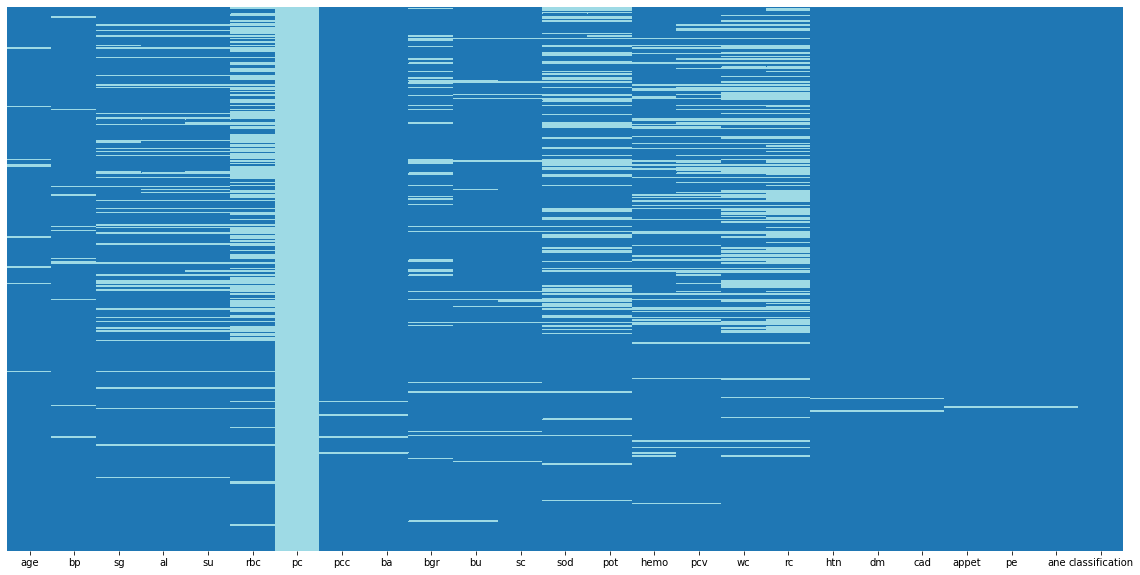

In [13]:
# Visualização de dados ausentes
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20')

Vemos valores nulos nas colunas idade, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, apetite , pe e ane. Vamos também encontrar a contagem de valores ausentes.

In [14]:
# Contagem de dados ausentes
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                400
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
# Extração de colunas nulas
null_cols = df.columns[df.isnull().any()]

Vamos dar uma olhada nos atributos categóricos que têm valores ausentes neles

In [16]:
for cols in df.select_dtypes("object"):
    df[cols] = df[cols].astype("category")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             391 non-null    float64 
 1   bp              388 non-null    float64 
 2   sg              353 non-null    float64 
 3   al              354 non-null    float64 
 4   su              351 non-null    float64 
 5   rbc             248 non-null    category
 6   pc              0 non-null      float64 
 7   pcc             396 non-null    category
 8   ba              396 non-null    category
 9   bgr             356 non-null    float64 
 10  bu              381 non-null    float64 
 11  sc              383 non-null    float64 
 12  sod             313 non-null    float64 
 13  pot             312 non-null    float64 
 14  hemo            348 non-null    float64 
 15  pcv             330 non-null    category
 16  wc              294 non-null    float64 
 17  rc              

In [18]:
cat_cols = []
for cols in df.select_dtypes("category"):
    cat_cols.append(cols)

In [19]:
cat_cols

['rbc',
 'pcc',
 'ba',
 'pcv',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [20]:
value_count_lst = []
for col in df.select_dtypes("category"):
    value_count_lst.append(df[col].value_counts())

In [21]:
value_count_lst

[normal      201
 abnormal     47
 Name: rbc, dtype: int64, notpresent    354
 present        42
 Name: pcc, dtype: int64, notpresent    374
 present        22
 Name: ba, dtype: int64, 52      21
 41      21
 44      19
 48      19
 40      16
 43      14
 42      13
 45      13
 33      12
 28      12
 32      12
 36      12
 50      12
 37      11
 34      11
 46       9
 29       9
 35       9
 30       9
 31       8
 39       7
 24       7
 26       6
 38       5
 54       4
 51       4
 47       4
 49       4
 53       4
 27       3
 25       3
 22       3
 23       2
 19       2
 14       1
 16       1
 \t?      1
 15       1
 9        1
 17       1
 18       1
 20       1
 21       1
 \t43     1
 Name: pcv, dtype: int64, no     251
 yes    147
 Name: htn, dtype: int64, no       258
 yes      134
 \tno       3
 \tyes      2
  yes       1
 Name: dm, dtype: int64, no      362
 yes      34
 \tno      2
 Name: cad, dtype: int64, good    317
 poor     82
 Name: appet, dtype: int64, no

In [22]:
de_cols = ['class','pus cell clumps','white blood cell count','red blood cell count','diabetes mellitus','coronary artery disease']

In [37]:
de_cols = ['classification','pcv','wc','rc','dm','cad']

In [36]:
for cols in df[de_cols]:
    df[cols] = df[cols].str.replace('\t',"")
    df[cols] = df[cols].replace("?",np.nan)
    df[cols] = df[cols].str.strip()

AttributeError: ignored

In [38]:
# Verificação com a variável "target" classificação
df.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

Vemos que os rótulos dos recursos estão livres de erros.

Vemos que após a imputação as colunas foram convertidas para o tipo de dados "objeto". Vamos converter as colunas "pcv", "wc" e "rc" para o tipo de dados numérico e as colunas "dm", "cad" e "classificação" para o tipo de dados "categoria".

Além disso, observamos que para alguns recursos "pcv", "wc" e "rc" existem muitos valores numéricos. É melhor convertê-los para o tipo de dados float.

In [39]:
cat_num_cols = ["pcv","wc","rc"]
for col in df[cat_num_cols]:
    df[col] = df[col].astype("float")

In [40]:
cat_obj_cols = ["dm","cad","classification"]
for col in df[cat_obj_cols]:
    df[col] = df[col].astype("category")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             391 non-null    float64 
 1   bp              388 non-null    float64 
 2   sg              353 non-null    float64 
 3   al              354 non-null    float64 
 4   su              351 non-null    float64 
 5   rbc             248 non-null    category
 6   pc              0 non-null      float64 
 7   pcc             396 non-null    category
 8   ba              396 non-null    category
 9   bgr             356 non-null    float64 
 10  bu              381 non-null    float64 
 11  sc              383 non-null    float64 
 12  sod             313 non-null    float64 
 13  pot             312 non-null    float64 
 14  hemo            348 non-null    float64 
 15  pcv             329 non-null    float64 
 16  wc              294 non-null    float64 
 17  rc              

### Outliers

In [42]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(24,40))
i=1
for column in df[num_cols]:
    plt.subplot(5,3,i)
    sns.boxplot(x=df.classification, y=df.loc[:,column])
    i = i + 1
    
plt.tight_layout()
plt.show()

NameError: ignored

<Figure size 1728x2880 with 0 Axes>

### Extração de dados numéricos e categóricos

In [176]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [177]:
cat_col,num_col=extract_cat_num(df)

In [122]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [123]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [124]:
### total unique categories in our categorical features to check if any dirtiness in data or not

In [125]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [126]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

    So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [129]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [130]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




    Looks good now apart from the NaNs

In [140]:
len(num_col)

14

###  Distribuição das features

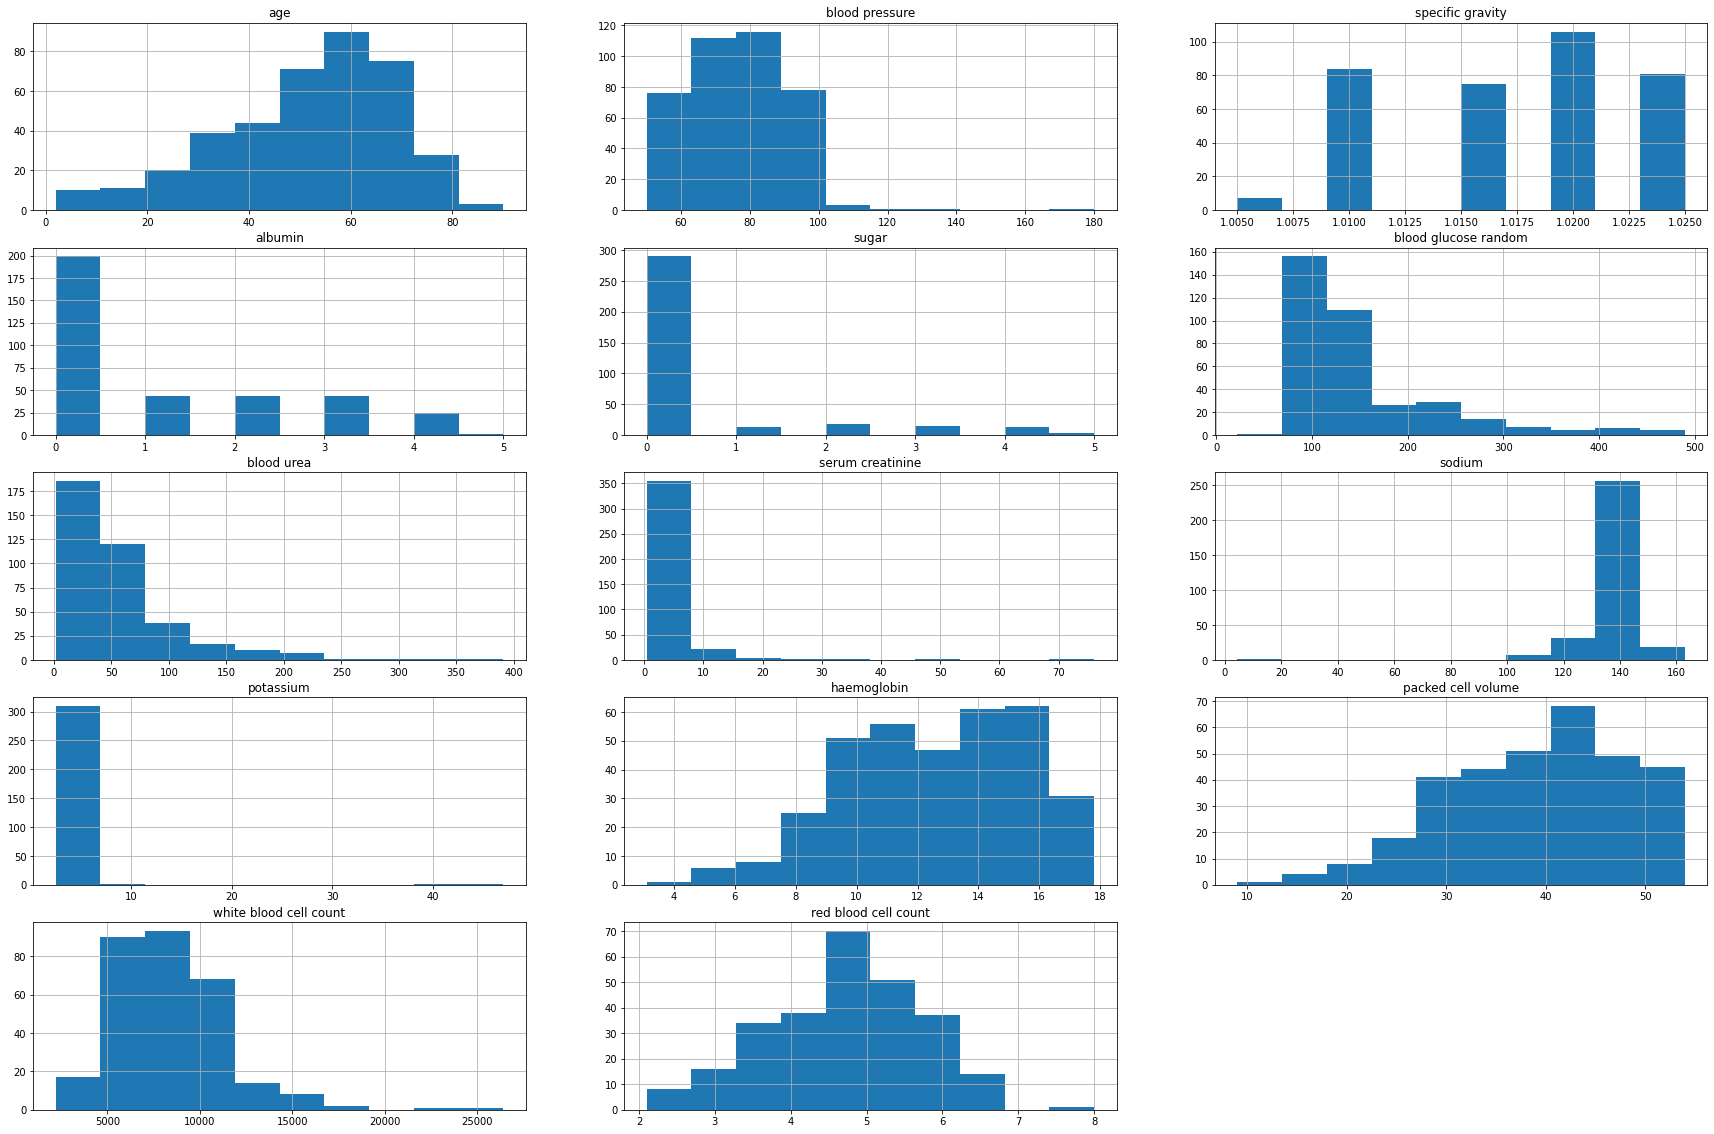

In [131]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

### Análise univarida


In [258]:
df.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

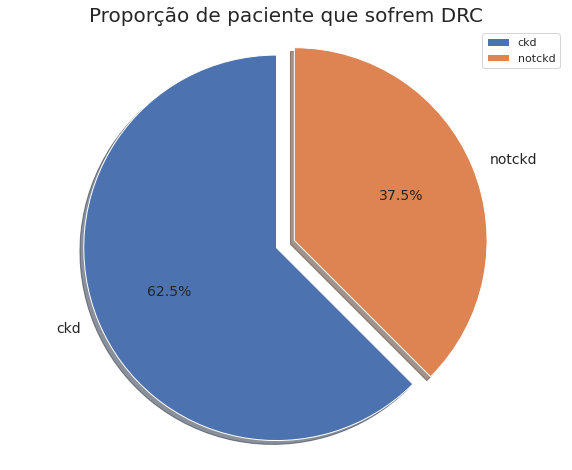

In [283]:
labels = 'ckd','notckd'
sizes = [df.classification[df['classification']=='ckd'].count(), df.classification[df['classification']=='notckd']
         .count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proporção de paciente que sofrem DRC",size=20)
plt.show()

### BoxPLots

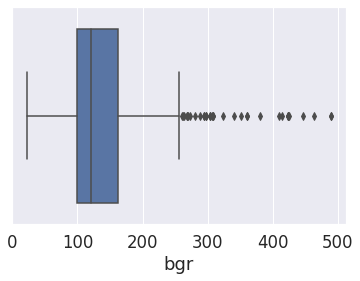

In [267]:
sns.boxplot( x=df["bgr"])

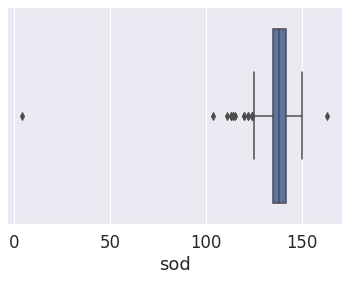

In [268]:
sns.boxplot( x=df["sod"])

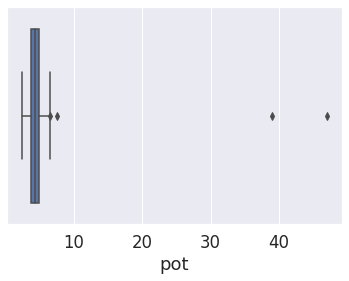

In [269]:
sns.boxplot( x=df["pot"])

### Análise bivariada

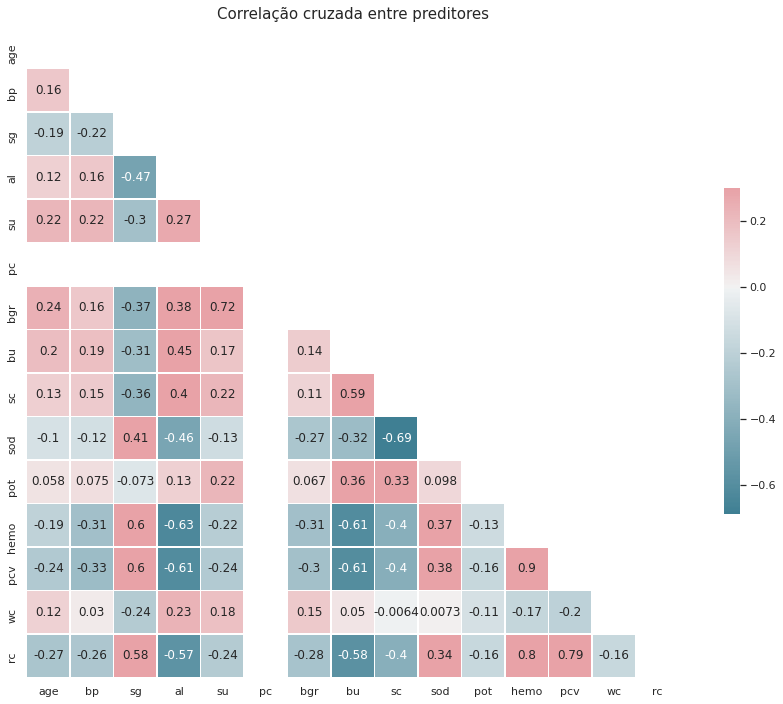

In [273]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.iloc[:, :-1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True);
plt.title("Correlação cruzada entre preditores", fontsize=15)
plt.show()

### Now, let's check the label distribution for categorical data

In [ ]:
len(cat_col)

11

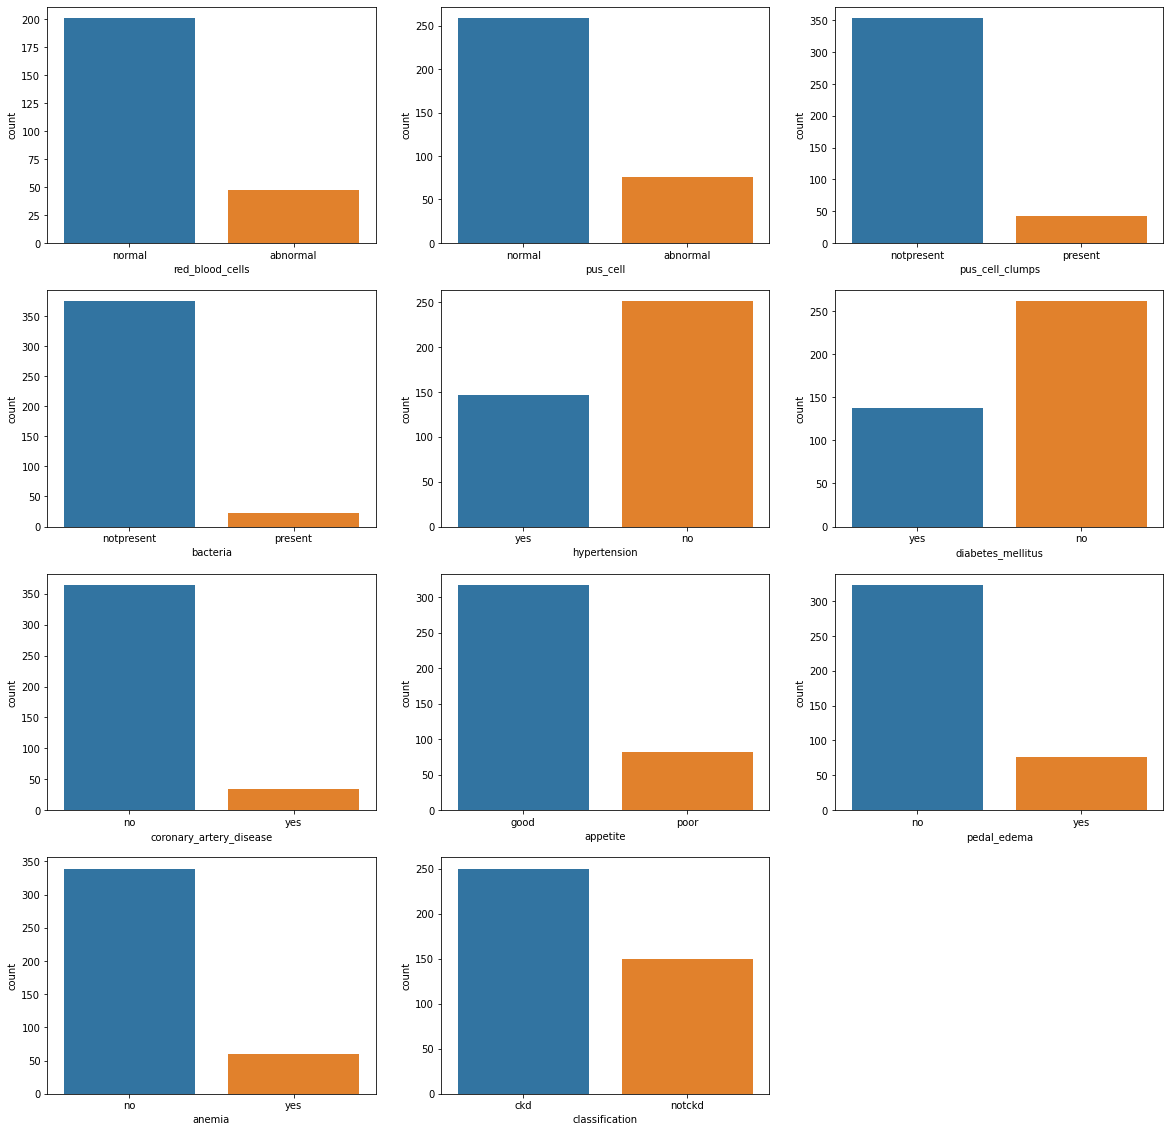

In [ ]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    

    A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

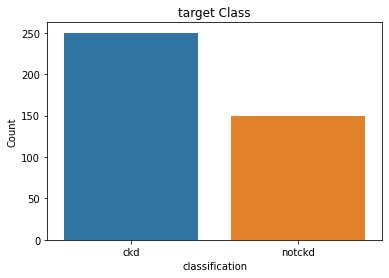

In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

In [ ]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

###  7. Correlations

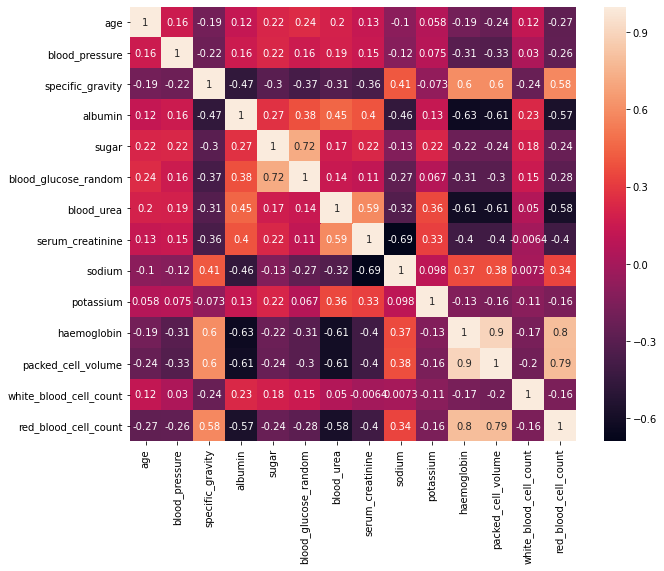

In [ ]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [ ]:
df.groupby(['red_blood_cells','classification'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells classification                                   
abnormal        ckd                25  3.832000     3.7  2.5  5.6
normal          ckd                40  3.782500     3.8  2.1  8.0
                notckd            134  5.368657     5.3  4.4  6.5

### Let's check for Positive correlation and its impact on classes¶

In [180]:
import plotly.express as px

In [181]:
px.violin(df,y='rc',x="classification", color="classification")

In [184]:
px.scatter(df,'hemo','pcc')

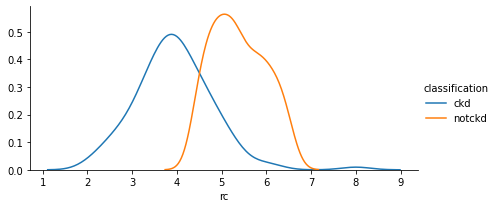

In [185]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(df, hue="classification",aspect=2)
grid.map(sns.kdeplot, 'rc')
grid.add_legend()

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

In [186]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    fig = px.violin(df, y=col, x="classification", color="classification", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="classification")
    return fig.show()

In [187]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="classification",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

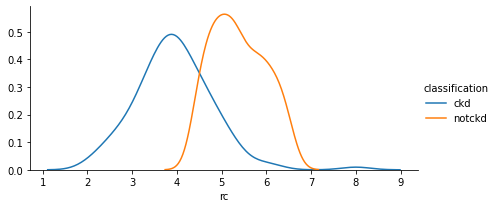

In [188]:
kde_plot('rc')

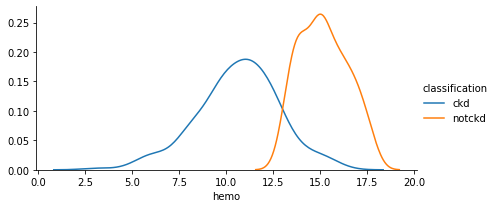

In [190]:
kde_plot('hemo')

In [192]:
scatters('rc', 'pcc')

In [193]:
scatters('rc', 'hemo')

In [274]:
scatters('pcv', 'hemo')

In [194]:
scatters('hemo','pcc')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [195]:
violin('rc')

In [196]:
violin('pcc')

###  Now let's check for negative correlation and its impact on classes

    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [199]:
scatters('rc','al')

    Clearly, albumin levels of above 0 affect ckd largely

In [200]:
scatters('pcc','bu')

    Packed cell volume >= 40 largely affects to be non ckd

In [201]:
fig = px.bar(df, x="sg", y="pcc",
             color='classification', barmode='group',
             height=400)
fig.show()

    Clearly, specific gravity >=1.02 affects non ckd

In [202]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,NaN,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,NaN,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,NaN,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,NaN,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [203]:
df.isna().sum().sort_values(ascending=False)

pc                400
rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
dtype: int64

In [204]:
cat_col

[]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



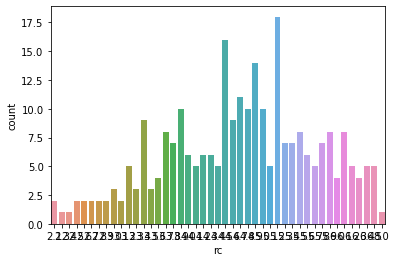

In [205]:
sns.countplot(df['rc'])

In [206]:
data=df.copy()

In [ ]:
### filling missing with Random value

#### Random Value Imputation

In [209]:
data['rc'].isnull().sum()

131

In [210]:
data['rc'].dropna().sample()

21    3.6
Name: rc, dtype: float64

In [211]:
random_sample=data['rc'].dropna().sample(data['rc'].isnull().sum())
random_sample

301    5.0
364    4.7
368    5.9
8      4.0
366    5.3
      ... 
323    4.5
389    5.8
91     5.6
311    5.6
35     4.9
Name: rc, Length: 131, dtype: float64

In [212]:
random_sample.index

Int64Index([301, 364, 368,   8, 366,  76, 105, 340, 207, 320,
            ...
            312, 307,  19, 385, 262, 323, 389,  91, 311,  35],
           dtype='int64', length=131)

In [213]:
data[data['rc'].isnull()].index

Int64Index([  1,   2,   6,  10,  13,  16,  17,  23,  28,  29,
            ...
            238, 239, 247, 273, 274, 287, 302, 319, 324, 330],
           dtype='int64', length=131)

In [214]:
random_sample.index=data[data['rc'].isnull()].index

In [215]:
random_sample.index

Int64Index([  1,   2,   6,  10,  13,  16,  17,  23,  28,  29,
            ...
            238, 239, 247, 273, 274, 287, 302, 319, 324, 330],
           dtype='int64', length=131)

In [216]:
random_sample

1      5.0
2      4.7
6      5.9
10     4.0
13     5.3
      ... 
287    4.5
302    5.8
319    5.6
324    5.6
330    4.9
Name: rc, Length: 131, dtype: float64

In [217]:
data.loc[data['rc'].isnull(),'rc']=random_sample

In [218]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,NaN,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,NaN,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,4.7,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,NaN,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,NaN,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



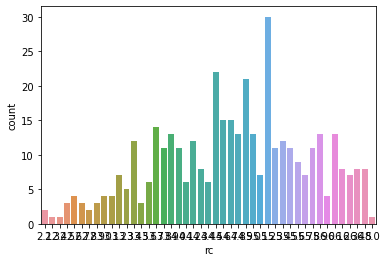

In [219]:
sns.countplot(data['rc'])

In [220]:
data['rc'].value_counts()/len(data)

5.2    0.0750
4.5    0.0550
4.9    0.0525
4.6    0.0375
4.7    0.0375
3.7    0.0350
3.9    0.0325
4.8    0.0325
6.1    0.0325
5.9    0.0325
5.0    0.0325
5.4    0.0300
4.2    0.0300
3.4    0.0300
4.0    0.0275
5.5    0.0275
5.3    0.0275
3.8    0.0275
5.8    0.0275
5.6    0.0225
6.2    0.0200
6.5    0.0200
6.4    0.0200
4.3    0.0200
6.3    0.0175
3.2    0.0175
5.7    0.0175
5.1    0.0175
4.4    0.0150
3.6    0.0150
4.1    0.0150
3.3    0.0125
2.6    0.0100
6.0    0.0100
3.1    0.0100
3.0    0.0100
2.5    0.0075
2.9    0.0075
2.7    0.0075
3.5    0.0075
2.1    0.0050
2.8    0.0050
2.4    0.0025
2.3    0.0025
8.0    0.0025
Name: rc, dtype: float64

In [221]:
len(df[df['rc']=='normal'])/248

0.0

In [222]:
len(df[df['rc']=='abnormal'])/248

0.0

In [223]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample



In [226]:
Random_value_imputation('pc')
Random_value_imputation('rc')

ValueError: ignored

In [227]:
data[cat_col].isnull().sum()

Series([], dtype: float64)

In [228]:
### as rest of the features has less missing values,so I can fill it using mode concept

In [229]:
mode=data['pcc'].mode()[0]
mode

'notpresent'

In [230]:

data['pcc']=data['pcc'].fillna(mode)

In [231]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [232]:
for col in cat_col:
    impute_mode(col)

In [233]:
data[cat_col].isnull().sum()

Series([], dtype: float64)

In [234]:
data[num_col].isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                400
pcc                 0
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
### lets fill missing values in Numerical features using Random value Imputation

In [235]:
for col in num_col:
    Random_value_imputation(col)

ValueError: ignored

In [236]:
data[num_col].isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc                 0
pc                400
pcc                 0
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### feature Encoding

In [243]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))
    

In [244]:
#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [245]:
from sklearn.preprocessing import LabelEncoder

In [246]:
le = LabelEncoder()

In [247]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [248]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,NaN,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,NaN,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,5.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,NaN,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,4.7,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,NaN,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,NaN,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Feature Importance

In [249]:

#SelectKBest-to select k best features

In [250]:
#chi2-Internally this class is going to check that whether p-value is less than 0.05 or not
#based on that,it will actually order all the features

In [251]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [252]:
ind_col=[col for col in data.columns if col!='classification']
dep_col='classification'

In [253]:
X=data[ind_col]
y=data[dep_col]

In [254]:

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

ValueError: ignored

In [255]:
ordered_feature

NameError: ignored

In [ ]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

In [ ]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

In [ ]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

In [ ]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [ ]:
features_rank

In [ ]:
#Higher the score is,more important feature is 

In [ ]:
features_rank.columns=['Features','Score']
features_rank

In [ ]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

In [ ]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [ ]:
X_new=data[selected_columns]

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [ ]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    184
1    116
Name: classification, dtype: int64

In [ ]:
### Lets find best model using Hyperparameter optimization

In [ ]:
from xgboost import XGBClassifier
XGBClassifier()

In [ ]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[20:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           use_label_encoder=True,
                                           validate_parameters=None,
                                           v

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [ ]:
classifier.fit(X_train,y_train)

[20:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[58  3]
 [ 0 39]]


In [ ]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [ ]:
accuracy_score(y_test, y_pred)

0.97